In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
res = pd.read_pickle('data/bert_data.pkl')
res_cl = pd.read_pickle('data/bert_data_cleaned.pkl')

In [3]:
res.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167])

In [4]:
res[0].keys()

dict_keys(['params', 'train_loss', 'train_metrics', 'test_loss', 'test_metrics'])

In [5]:
print(res[0]['params'], res_cl[0]['params'], sep='\n')

{'batch_size': 8, 'lr': 1e-05, 'max_spoil': 1, 'spoil_proba': 0.2}
{'batch_size': 16, 'lr': 1e-05, 'max_spoil': 1, 'spoil_proba': 0.1, 'timer': 0}


In [6]:
res[0]['train_loss'][:10]

[0.6872226595878601,
 0.6598387360572815,
 0.5891317129135132,
 0.5863105058670044,
 0.6058876514434814,
 0.5785975456237793,
 0.4260127544403076,
 0.5548093318939209,
 0.5037102103233337,
 0.5790655016899109]

In [7]:
res[0]['train_metrics']

{'accuracy': [0.795467887753904,
  0.7949982388164847,
  0.8055653399084185,
  0.8087354702359986,
  0.8066220500176118,
  0.816249853234707,
  0.8048608665022895,
  0.8164846777034167,
  0.8178936245156745,
  0.8140190207819655],
 'precision': [0.0,
  0.0,
  0.0,
  0.8541666666666666,
  0.7757009345794392,
  0.8245614035087719,
  0.6844660194174758,
  0.7026143790849673,
  0.7181467181467182,
  0.7292993630573248],
 'recall': [0.0,
  0.0,
  0.0,
  0.02465423932651834,
  0.04865181711606096,
  0.05735204392922514,
  0.0811277330264672,
  0.12744516893894486,
  0.11177884615384616,
  0.13252314814814814],
 'f1': [0.0,
  0.0,
  0.0,
  0.04792518994739918,
  0.09156094870380585,
  0.10724472333143183,
  0.14506172839506173,
  0.21575514300050175,
  0.1934477379095164,
  0.22428991185112634]}

In [8]:
def plot(data):
    for metric, values in data.items():
        plt.plot(values, label=metric)
        plt.xlabel('Epochs')
    plt.legend(loc='best')
    plt.show()

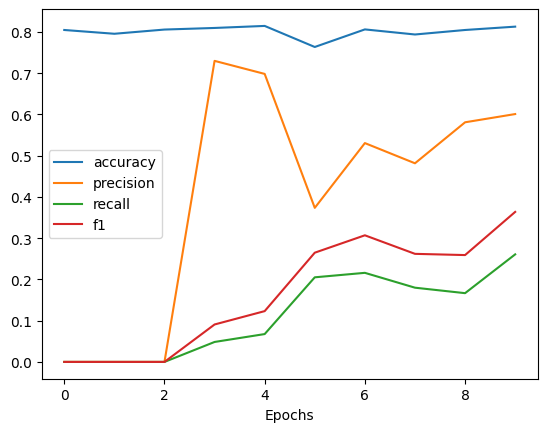

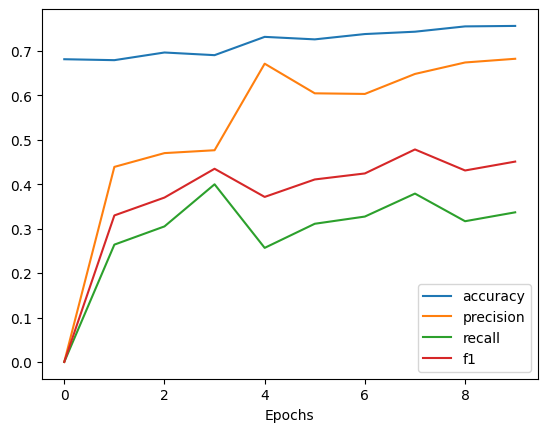

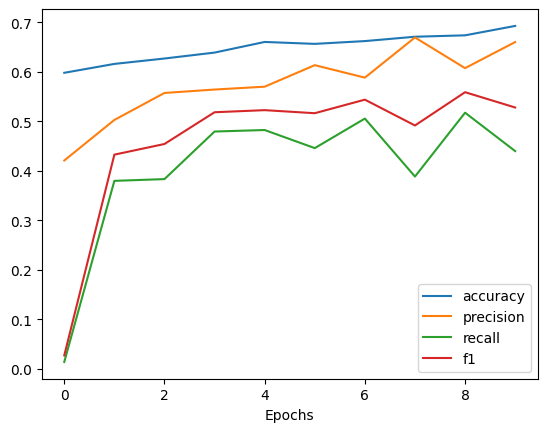

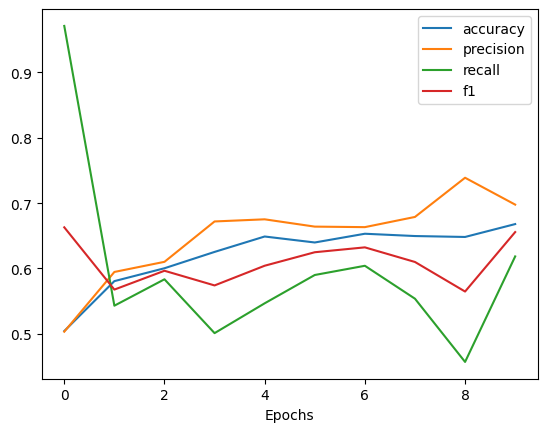

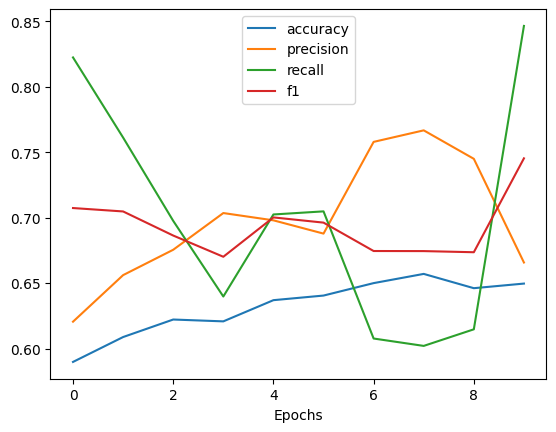

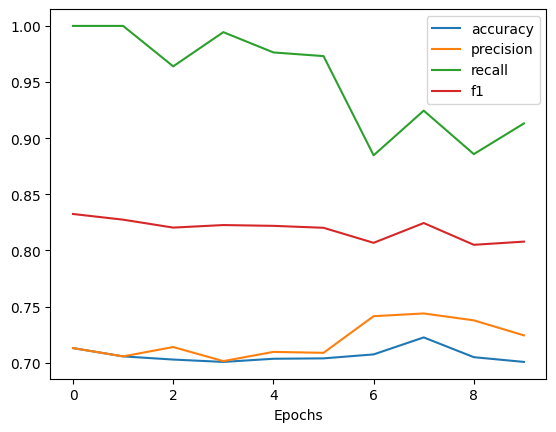

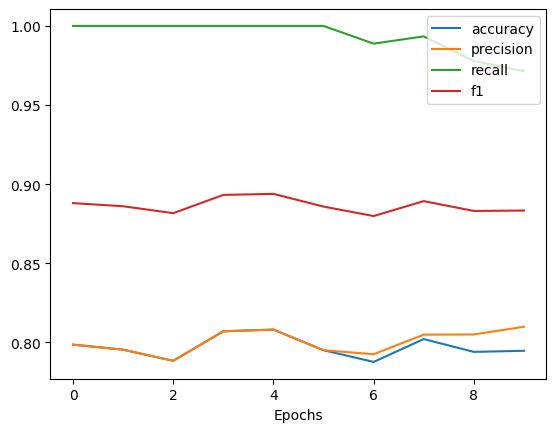

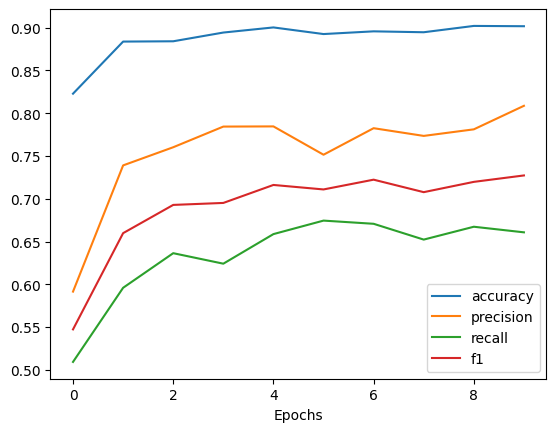

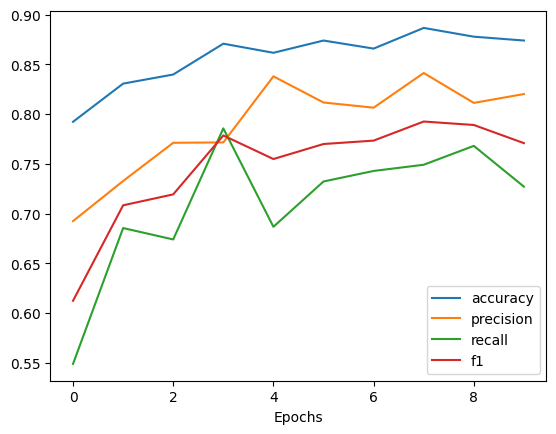

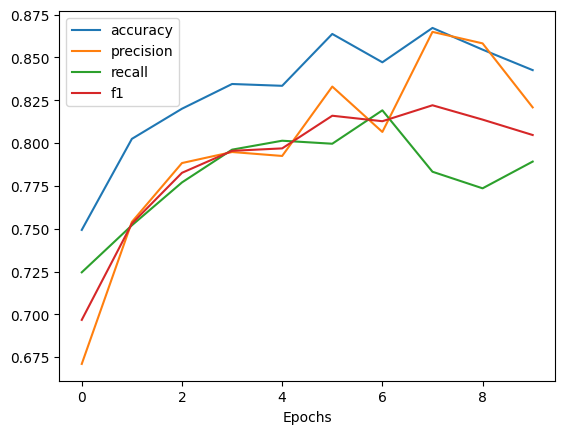

In [9]:
i = 0
for key in res:
    plot(res[key]['test_metrics'])
    i += 1
    if i >= 10:
        break

In [10]:
def analyze(arr):
    best = None
    best_f1 = 0
    
    for key in res:
        data = arr[key]['test_metrics']['f1']
        f1 = max(data)
        if best_f1 < f1:
            best_f1 = f1
            best = arr[key]['params']
    print(best_f1, best, sep="\n")
    return best_f1, best

In [11]:
analyze(res);

0.9906297668337328
{'batch_size': 16, 'lr': 0.0001, 'max_spoil': 7, 'spoil_proba': 0.8000000000000003}


In [12]:
analyze(res_cl);

0.9944348493571291
{'batch_size': 16, 'lr': 0.0001, 'max_spoil': 7, 'spoil_proba': 0.9000000000000001, 'timer': 0}


In [13]:
def get_data(param):
    pt = dict()
    for data in res_cl.values():
        f1 = data['test_metrics']['f1']
        mx_spoil = data['params'][param]
        if not mx_spoil in pt:
            pt[mx_spoil] = f1
        for i in range(len(pt[mx_spoil])):
            pt[mx_spoil][i] = max(pt[mx_spoil][i], f1[i])
    return pt

In [14]:
def get_fmt(val):
    if isinstance(val, float):
        return f'{val:.6f}'
    return val

In [15]:
def plt_data(data, param):
    plt.title(f"F1 score depending on {param}")
    for val in data:
        plt.plot(data[val], label=get_fmt(val))

    plt.xlabel("epochs")
    plt.ylabel("f1_score")
    plt.legend()

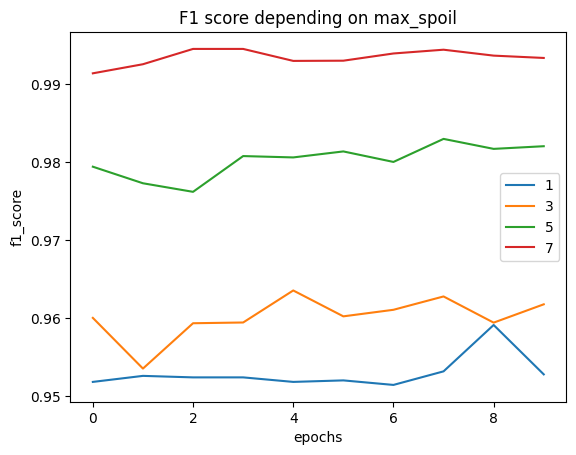

In [16]:
mx_spoil = get_data("max_spoil")
plt_data(mx_spoil, "max_spoil")

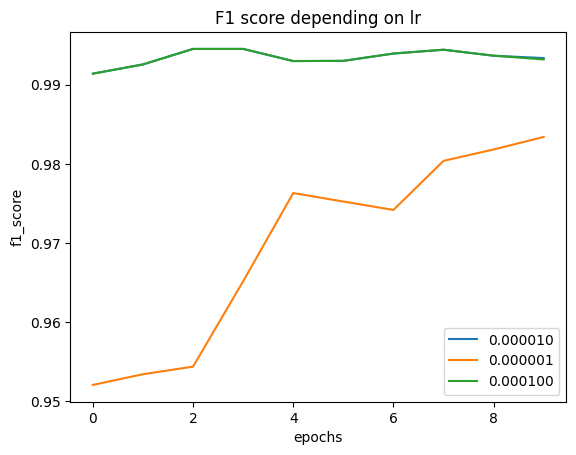

In [17]:
lr = get_data("lr")
plt_data(lr, "lr")

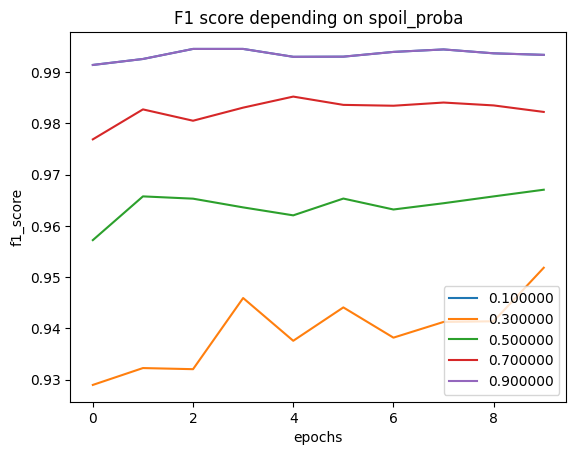

In [18]:
spoil_proba = get_data("spoil_proba")
plt_data(spoil_proba, "spoil_proba")